In [1]:
import numpy as np
import odes

Name: Jacob Anabi,

Student ID: 2294644,

Email: anabi@chapman.edu,

Course: PHYS220/MATH220/CPSC220 Fall 2018

Assignment: CW11

# Abstract

In this paper we will be comparing a variety of methods to solve differential equations.

# Introduction

Rememember from CW10 that there are many analytical methods to solve an ordinary differential equation (ODE). These methods include:

Euler's Method, Heun's (Trapezoid) Method, 2nd-order Runge-Kutta Method, and 4th-order Runge-Kutta Method.

# Coupled ODE Example

Let's consider the coupled set of ODEs with initial conditions $x(0) = 1$, $v(0) = 0$:

   $$x'(t) = v(t)$$
   $$v'(t) = -x(t)$$

If $x(t) = \cos(t)$, then $v(t) = x'(t) = -\sin(t)$

So, $v'(t) = -\cos(t) = -x(t)$

Thus, $x(t) = \cos(t)$ and $v(t) = -\sin(t)$ satisfies these equations. This solution can represent some sort of oscillation of a physical system.

# Methods

To solve the following equation with the aformentioned methods, we will state:
$$\vec{r}'(t) = \hat{J}\vec{r}$$
where $\vec{r}(t) = [x(t), v(t)]$ is a column vector with initial condition $\vec{r}(0) = [1,0]$, such that the coordinates are coupled by an antisymmetric matrix (meaning its transpose equals its negative):
$$\hat{J} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$
This solution should be $\vec{r}(t) = \exp(t\hat{J})\vec{r}(0)$.

NOTE: $\exp(t\hat{J}) = \hat{I}\sum_{n=0}^\infty t^{2n}(-1)^n/(2n)! + \hat{J}\sum_{n=1}^\infty t^{2n-1}(-1)^{n-1}/(2n-1)! = \hat{I}\cos(t) + \hat{J}\sin(t)$

We will solve this differential equation from $t=0$ until $t= 5(2\pi)$ using $N$ time steps per period (so $\Delta t = 2\pi / N$).

## Euler's Method

For refamilirization, Euler's Method, which is accurate to 1st-order, is defined as:
$$u_{k+1} = u_k + \Delta t\, f[t_k, u_k]$$
where $f[t, u(t)]$ is the slope of $u(t)$ at some domain point $t$.

For clarity sake, we will rewrite this in terms of vectors:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + \Delta t\, \vec{r}'(t_k)$$
Subsituting $\Delta t = 2\pi / N$, we get:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + 2\pi / N\, \vec{r}'(t_k)$$
Substituting $$\vec{r}'(t) = \hat{J}\vec{r}$$ we get:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + 2\pi / N\, \hat{J}\vec{r}(t_k)$$

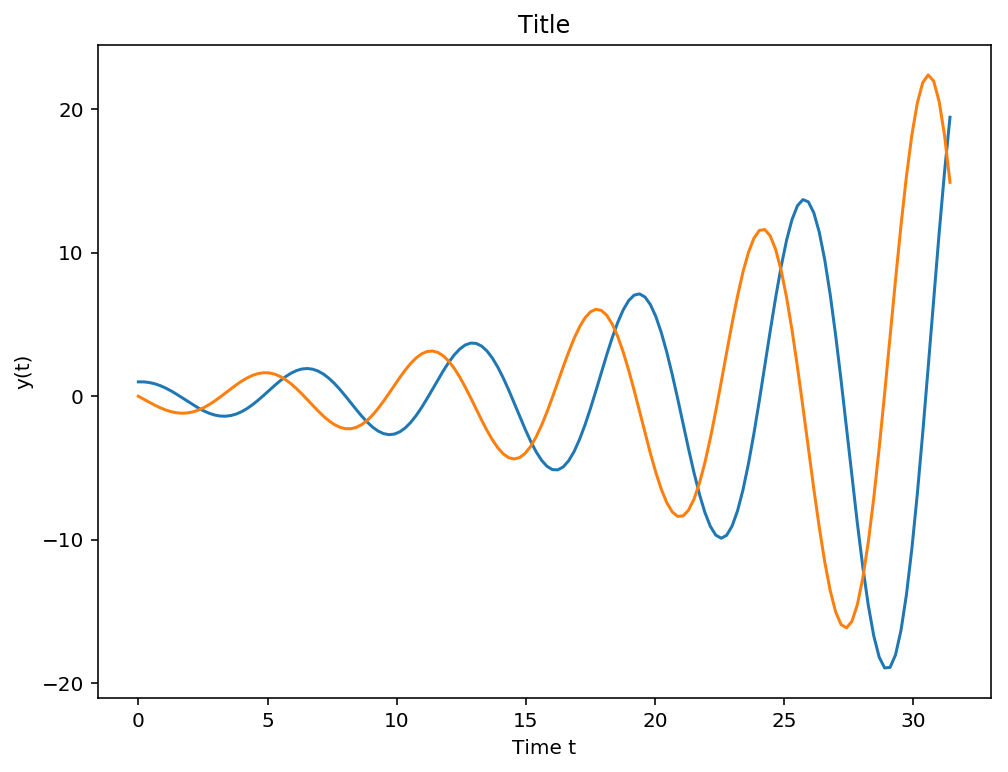

In [2]:
r0 = np.array([1,0])
N = 30
r = odes.euler_method(r0, N)
x = [i[0] for i in r]
v = [i[1] for i in r]
t = np.linspace(0, 5*(2*np.pi), 5*N, endpoint=True) # domain points
odes.gen_plot(t, [x,v], "Time t", ["x(t)", "y(t)"], "Title")